# Human Activities

In [1]:
from pylab import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, manifold
from sklearn.cluster import AgglomerativeClustering, KMeans
#from random import sample
#from scipy.spatial.distance import pdist, squareform
#from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Importation des données

Pour ce TP nous allons proposer un clustering de données d'acceleromètres enregistrées sur les smart-phones
Les données sources sont disponibles sur le site de l'UCI https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones#

"The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details."


In [2]:
votre_path= "/Users/asus/Documents/Python Scripts/data/UCI HAR Dataset/"
#"/home/michel/Dropbox/Enseignements/M2-ReducDim-TDA/Agathe-Bertrand-M2-ApprentissageADD/TpsBertrand/Datasets"

Importation de la base d'apprentissage de donnees de features

In [3]:
# recupération des noms des variables dans le fichier "features.txt"
data_path = votre_path + "features.txt"
features_names =    pd.read_csv(data_path,delim_whitespace=True,header=None)
data_path = votre_path + "train/X_train.txt"
activity_features = pd.read_csv(data_path,delim_whitespace=True,header=None,names=features_names.values[:,1])
activity_features.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


Recuperations des types d'activites

In [6]:
data_path = votre_path + "train/y_train.txt"
activity  =    pd.read_csv(data_path,delim_whitespace=True,header=None)
activity  =  activity.values[:,0] -  1
activity_names = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

array([4, 4, 4, ..., 1, 1, 1], dtype=int64)

Recuperations des sujets

In [7]:
data_path = votre_path + "train/subject_train.txt"
sujet =  pd.read_csv(data_path,delim_whitespace=True,header=None)
sujet =sujet.values[:,0]

Importation des donnees brute accelerometre

In [8]:
data_path = votre_path + "train/Inertial Signals/body_acc_x_train.txt"
acc_x = pd.read_csv(data_path,delim_whitespace=True,header=None).values
data_path = votre_path + "train/Inertial Signals/body_acc_y_train.txt"
acc_y = pd.read_csv(data_path,delim_whitespace=True,header=None).values
data_path = votre_path + "train/Inertial Signals/body_acc_z_train.txt"
acc_z = pd.read_csv(data_path,delim_whitespace=True,header=None).values

## Quelques représentations graphiques

 Visualisation de l'acceleration du corps en 3D

C:\Users\asus\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


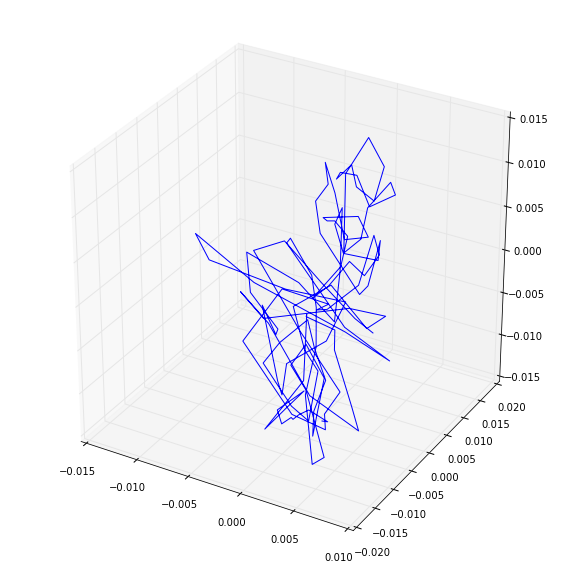

In [9]:
id = 2
plt.figure(figsize = (10,10))
plt.gca(projection='3d')
plt.plot(acc_x[id,],acc_y[id,],acc_z[id,])

Calcul de correlations entre features

<matplotlib.colorbar.Colorbar instance at 0x000000001F7582C8>

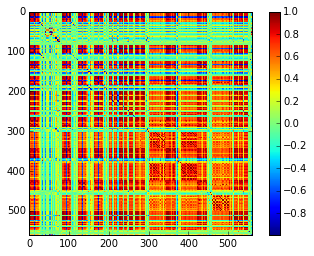

In [10]:
R = corrcoef(activity_features.T) # attention les variables doivent etre en lignes pour la fonction numpy.corrcoef
plt.imshow(R, interpolation='none')
plt.colorbar()

#Clustering sur les données du sujet 1

Nous allons utiliser les fonctions de sklearn. Il y a aussi  beaucoup d'algorithmes de clusering disponibles dans la librairie Scipy : 
http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy

Extraction des données du sujet 1 :

In [11]:
I1 = where(sujet  == 1)
act_sujet1 = activity[I1] # activité pratiquée (de 0 à 5)
print(act_sujet1)
features_sujet1 = activity_features.iloc[I1] #  syntaxe pandas 
features_sujet1.head()


[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5
 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### CAH pour les variables tBodyAcc-mean  et tBodyAcc-sdt pour le sujet 1

In [12]:
DataExtract = features_sujet1.iloc[:,0:6] # donnees du sujet 1 sur les 6 premieres variables
DataExtract.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482


In [13]:
# methode de Ward avec sklearn
clustering_ward = AgglomerativeClustering(linkage="ward", n_clusters=6)
clustering_ward.fit(DataExtract)
print(clustering_ward.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 1 1 0 0 1 1 1 3
 3 3 3 3 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 2 2 2 2 2 2 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Representation du clustering, par exemple sur les deux premiers axes d'ISOMAP

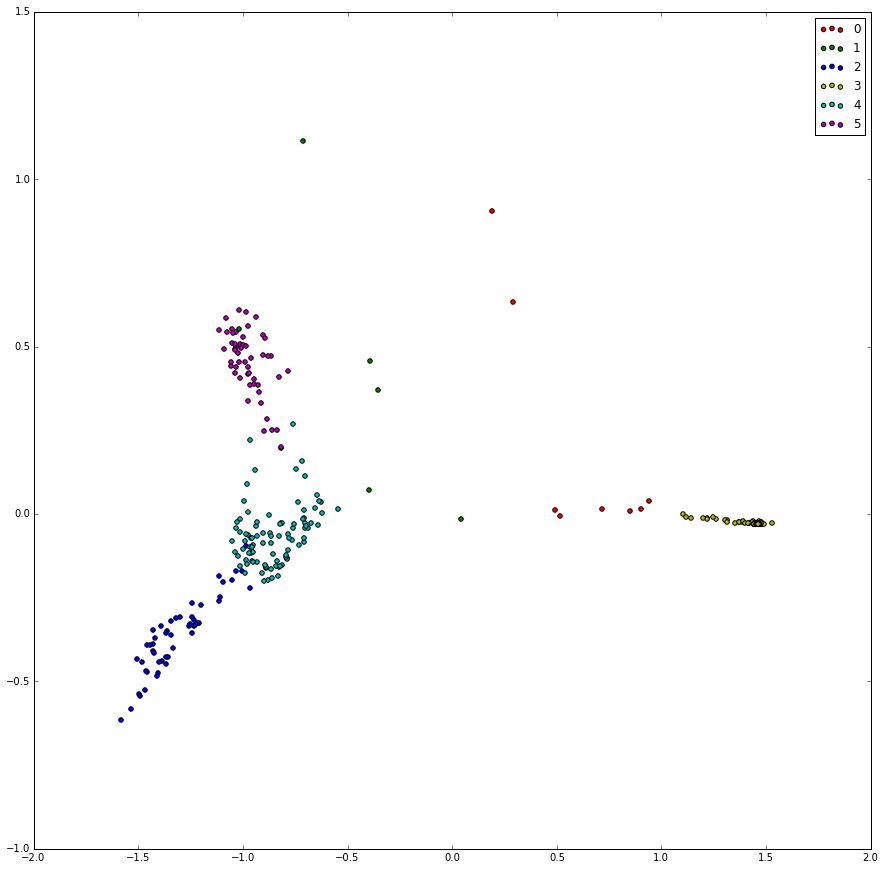

In [14]:
isomap_DataExtract = manifold.Isomap(5, n_components=2).fit_transform(DataExtract)
iso_Comp0 = isomap_DataExtract[:,0]
iso_Comp1 = isomap_DataExtract[:,1]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
for c, i, act in zip("rgbycm", range(0,7),range(0,7)):
    ax.scatter(iso_Comp0[clustering_ward.labels_==i],iso_Comp1[clustering_ward.labels_==i], c=c, label=act)
ax.legend()


Le clustering obtenu est coherent avec la reduction de dimension obtenue via ISOMAP


### k-means  sur les mêmes données avec la fonction kmeans maison

In [15]:
from  mykmeans import *
Centres, Groupes = mykmeans(DataExtract.values,5)
Groupes

C:\Users\asus\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

On trouve le plus souvent une seule classe, lié a l'initialisation ...

### k-means++ sur les mêmes données

In [16]:
clustering_KMeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300)
clustering_KMeans.fit(DataExtract)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Representation du clustering, par exemple sur les deux premiers axes d'ISOMAP 

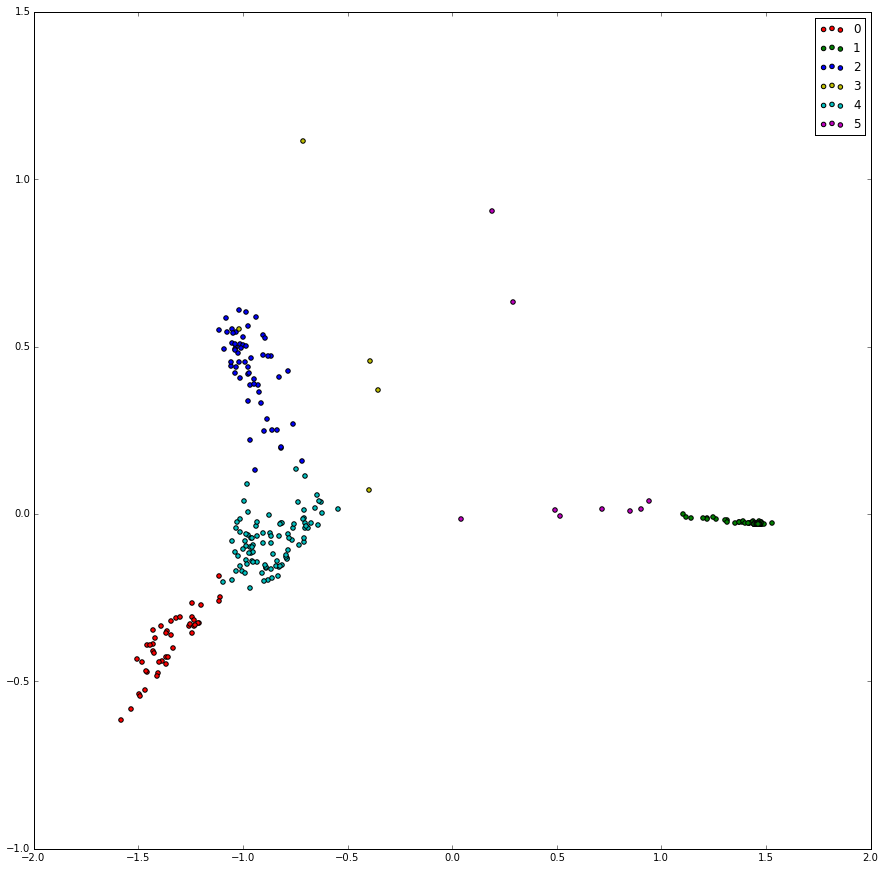

In [17]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
for c, i, act in zip("rgbycm", range(0,7), range(0,7)):
    ax.scatter(iso_Comp0[clustering_KMeans.labels_==i],iso_Comp1[clustering_KMeans.labels_==i], c=c, label=act)
ax.legend()

### Coherence des deux clustering 

L'Adjusted Random Index est un coefficient qui permet de comparer deux clusterings : 
http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index

In [18]:
metrics.adjusted_rand_score(clustering_KMeans.labels_,clustering_ward.labels_)  

0.9414893494054695

 ### Comparaison du clustering avec la classification par activité

In [19]:
metrics.adjusted_rand_score(clustering_KMeans.labels_,act_sujet1) 

0.6290123618966589

Le clustering n'est pas si éloigné de la classication (connue) par activités.

On représente la matrice de confusion pour comparer avec les individus.

<matplotlib.colorbar.Colorbar instance at 0x000000001FB19AC8>

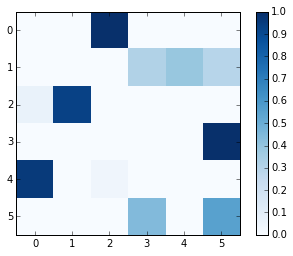

In [20]:
from sklearn.metrics import confusion_matrix
M  = confusion_matrix(clustering_KMeans.labels_,act_sujet1) 
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]
plt.imshow(M_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
#plt.title("Matrice de confusion ")
#plt.tight_layout()
#plt.ylabel(' ')
#plt.xlabel(' ')

# Clustering a activité fixée

Cette fois on conserve les 40 features pour une activité et tous les individus

In [ ]:
myact = 5
Imyact = np.where(activity == myact)
sujet_actfixee = sujet[Imyact]
# données pour activité myact sur les 40 premières variables :
features_myact = activity_features.iloc[Imyact].iloc[:,range(0,40)] 
features_myact.head()

Projection sur 2 axes de l'ACP


In [ ]:
pca_features_myact = PCA(n_components=2).fit(preprocessing.scale(features_myact)).transform(features_myact)
#pca_features_myact = pca_features_myact
#.fit(preprocessing.scale(features_myact))
pca_Comp0 = pca_features_myact[:,0]
pca_Comp1 = pca_features_myact[:,1]
pca_Comp0.shape

In [ ]:
plt.figure(figsize=(15, 15))
for c, i, suj in zip(matplotlib.colors.cnames, range(1,31,1),range(1,31,1)):
    plt.scatter(pca_Comp0[sujet_actfixee==i],pca_Comp1[sujet_actfixee==i],
               c=c, label=suj)
plt.legend()

Pas de stucture en clusters franche sur ces données.
Que donne un clustering, par exemple k-means++ dans cette situation ? 

In [ ]:
nbclust = 3
clustering_myact_KMeans = KMeans(n_clusters=nbclust, init='k-means++', n_init=10, max_iter=1000)
clustering_myact_KMeans.fit(features_myact)

Representation sur les deux premiers axes de l'ACP

In [ ]:
plt.figure(figsize=(15, 15))

for c, i, suj in zip(matplotlib.colors.cnames, range(0,nbclust),range(0,nbclust)):
    plt.scatter(pca_Comp0[clustering_myact_KMeans.labels_==i],pca_Comp1[clustering_myact_KMeans.labels_==i],
               c=c, label=suj)
plt.legend()

Effectifs des classes :

In [ ]:
from collections import Counter
Counter(clustering_myact_KMeans.labels_)

In [ ]:
M  = confusion_matrix(clustering_myact_KMeans.labels_,sujet_actfixee-1) 
print(M[range(3),:])

Pas vraiment proche de la classification en individus. 
Pas facile de retrouver "à l'aveugle" les individus en regardant seulement une activité

###Calcul des coefficients de silhouette

Le coefficient de silhouette est un indicateur qui permet de mesurer si le clustering a une bonne structure :

http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

On peut s'en servir pour choisir le nombre de clusters.  

In [ ]:
sil = zeros(10)
for k in range(2,10):
    kclustering_myact_KMeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000)
    kclustering_myact_KMeans.fit(features_myact)
    sil[k] = metrics.silhouette_score(features_myact,kclustering_myact_KMeans.labels_)

print(sil)    

Aucun clustering n'est vraiment bon de toutes façons dans le cas présent